In [1]:
#Necessary imports
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium
import warnings
warnings.filterwarnings("ignore")

Query in MTA data from first quarter of 2022

In [2]:
from sqlalchemy import create_engine
engine = create_engine("sqlite:///mta_data.db")
engine

Engine(sqlite:///mta_data.db)

In [3]:
mta_df=pd.read_sql('SELECT * FROM mta_data;',engine)
mta_df

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,00:00:00,REGULAR,7695440,2680637
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,04:00:00,REGULAR,7695447,2680645
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,08:00:00,REGULAR,7695452,2680673
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,12:00:00,REGULAR,7695468,2680747
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,16:00:00,REGULAR,7695511,2680791
...,...,...,...,...,...,...,...,...,...,...,...
2728516,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2021,04:00:00,REGULAR,5562,1001
2728517,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2021,08:00:00,REGULAR,5562,1001
2728518,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2021,12:00:00,REGULAR,5562,1001
2728519,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,12/31/2021,16:00:00,REGULAR,5562,1001


In [4]:
mta_df.DATE.value_counts().sort_index()

01/01/2022    30079
01/02/2022    29905
01/03/2022    29913
01/04/2022    30000
01/05/2022    30009
              ...  
12/27/2021    29941
12/28/2021    30241
12/29/2021    30005
12/30/2021    30130
12/31/2021    29943
Name: DATE, Length: 91, dtype: int64

In [5]:
mta_df["DATE_TIME"]=pd.to_datetime(mta_df.DATE + " " + mta_df.TIME, format="%m/%d/%Y %H:%M:%S")

In [6]:
#get data only from Jan 2022 to March 2022 
mta_df=mta_df[mta_df["DATE_TIME"]>= "2022-01-01 00:00:00"]

In [7]:
mta_df["Hour"]=mta_df["DATE_TIME"].dt.hour
mta_df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,Hour
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,00:00:00,REGULAR,7695440,2680637,2022-03-19 00:00:00,0
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,04:00:00,REGULAR,7695447,2680645,2022-03-19 04:00:00,4
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,08:00:00,REGULAR,7695452,2680673,2022-03-19 08:00:00,8
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,12:00:00,REGULAR,7695468,2680747,2022-03-19 12:00:00,12
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,16:00:00,REGULAR,7695511,2680791,2022-03-19 16:00:00,16
5,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/19/2022,20:00:00,REGULAR,7695583,2680849,2022-03-19 20:00:00,20
6,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2022,00:00:00,REGULAR,7695607,2680864,2022-03-20 00:00:00,0
7,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2022,04:00:00,REGULAR,7695612,2680874,2022-03-20 04:00:00,4
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2022,08:00:00,REGULAR,7695619,2680891,2022-03-20 08:00:00,8
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/20/2022,12:00:00,REGULAR,7695643,2680954,2022-03-20 12:00:00,12


In [8]:
#get rid of duplicate entry
mta_df.sort_values(["C/A","UNIT","SCP","STATION","DATE_TIME","Hour"],inplace=True, ascending=False)
mta_df.drop_duplicates(subset=["C/A","UNIT","SCP","STATION","DATE_TIME","Hour"],inplace=True)

In [9]:
mta_df=(mta_df.groupby(["C/A","UNIT","SCP","STATION","DATE","Hour"],as_index=False).ENTRIES.first())
mta_df.head()

,C/A,UNIT,SCP,STATION,DATE,Hour,ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2022,3,7675872
1,A002,R051,02-00-00,59 ST,01/01/2022,7,7675876
2,A002,R051,02-00-00,59 ST,01/01/2022,11,7675887
3,A002,R051,02-00-00,59 ST,01/01/2022,15,7675895
4,A002,R051,02-00-00,59 ST,01/01/2022,19,7675920


In [10]:
mta_df[["PREVIOUS_DATE","PREVIOUS_ENTRIES"]]= mta_df.groupby(["C/A","UNIT","SCP","STATION"])["DATE","ENTRIES"].shift()
mta_df.head()

,C/A,UNIT,SCP,STATION,DATE,Hour,ENTRIES,PREVIOUS_DATE,PREVIOUS_ENTRIES
0,A002,R051,02-00-00,59 ST,01/01/2022,3,7675872,NaN,NaN
1,A002,R051,02-00-00,59 ST,01/01/2022,7,7675876,01/01/2022,7675872.0
2,A002,R051,02-00-00,59 ST,01/01/2022,11,7675887,01/01/2022,7675876.0
3,A002,R051,02-00-00,59 ST,01/01/2022,15,7675895,01/01/2022,7675887.0
4,A002,R051,02-00-00,59 ST,01/01/2022,19,7675920,01/01/2022,7675895.0


In [11]:
#remove null value
mta_df.dropna(subset=["PREVIOUS_DATE"],axis=0, inplace=True)

In [12]:
mta_df[mta_df["ENTRIES"]<mta_df["PREVIOUS_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,Hour,ENTRIES,PREVIOUS_DATE,PREVIOUS_ENTRIES
19649,A011,R080,01-03-00,57 ST-7 AV,01/01/2022,7,885534277,01/01/2022,885534287.0
19650,A011,R080,01-03-00,57 ST-7 AV,01/01/2022,11,885534251,01/01/2022,885534277.0
19651,A011,R080,01-03-00,57 ST-7 AV,01/01/2022,15,885534199,01/01/2022,885534251.0
19652,A011,R080,01-03-00,57 ST-7 AV,01/01/2022,19,885534082,01/01/2022,885534199.0
19653,A011,R080,01-03-00,57 ST-7 AV,01/01/2022,23,885534022,01/01/2022,885534082.0


In [13]:
mta_df[mta_df["ENTRIES"]<mta_df["PREVIOUS_ENTRIES"]].groupby(["C/A","UNIT","SCP","STATION"]).size()

C/A    UNIT  SCP       STATION        
A011   R080  01-03-00  57 ST-7 AV         505
A033   R170  02-00-04  14 ST-UNION SQ       1
A042   R086  01-00-04  PRINCE ST            1
A049   R088  02-05-00  CORTLANDT ST       293
A050   R088  00-05-01  CORTLANDT ST         1
                                         ... 
R637   R451  00-06-00  WINTHROP ST          1
R647   R110  02-05-01  FLATBUSH AV-B.C      2
R730   R431  00-00-04  EASTCHSTER/DYRE    454
S101   R070  00-00-03  ST. GEORGE           1
TRAM2  R469  00-05-01  RIT-ROOSEVELT        1
Length: 210, dtype: int64

In [14]:
#Source: from course material
def daily_num(row,max_counter):
    counter=row["ENTRIES"]-row["PREVIOUS_ENTRIES"]
    if counter <0:
        counter = -counter
    if counter>max_counter:
        print(row["ENTRIES"],row["PREVIOUS_ENTRIES"])
        return 0
    return counter

mta_df["DAILY_ENTRIES"]=mta_df.apply(daily_num, axis=1, max_counter = 500000)

302 7354911.0
4 9951098.0
550698920 14.0
327680 67108864.0
73 672069.0
5 526675.0
4 3622304.0
13 1562955740.0
108 2900739.0
0 925201.0
964 2121718.0
24 4211788.0
163 549211.0
119 5962731.0
127 4224541.0
12 2645459.0
16758736 44963.0
1 590157.0
200 5808834.0
5 1940653.0
53 1191921.0
306313 134457675.0
189 3433215.0
17 914358.0
1253649 190646.0
190720 1253649.0
61889 840230.0
889011 50.0
50 889011.0
172 534101.0
7 21129400.0
3360 2076799.0
8962474 573866.0
573901 8962474.0
14 575039.0
135 2397667.0
186 2506348.0
44 822998.0
4 1289819897.0
1048592 9753966.0
52 743646.0
85 3970484.0
26 1189272.0
10 795609.0
1996226557 478717.0
0 720896.0
151 2037287.0
311389 1781420.0
47 6132692.0
41 13962499.0
33 2095810.0
2030106827 7958457.0
1594098258 73352962.0
76 2045975229.0
9 750772.0
42 2004946.0
22 1089734.0
1089745 26745.0


In [15]:
# Daily entries at each station
station_per_day=mta_df.groupby(["STATION","DATE"])["DAILY_ENTRIES"].sum().reset_index()

In [16]:
#Total entries at each station on Weekdays
mta_df['DAY']=pd.to_datetime(mta_df['DATE']).dt.dayofweek
weekday_df=mta_df.loc[mta_df['DAY'].isin([0,1,2,3,4])]
weekday_entries=weekday_df.groupby('STATION')['DAILY_ENTRIES'].sum().sort_values(ascending=False).reset_index()
weekday_entries.head()

,STATION,DAILY_ENTRIES
0,34 ST-PENN STA,2976759.0
1,PATH NEW WTC,2957127.0
2,JOURNAL SQUARE,2483090.0
3,125 ST,2401206.0
4,GRD CNTRL-42 ST,2388150.0


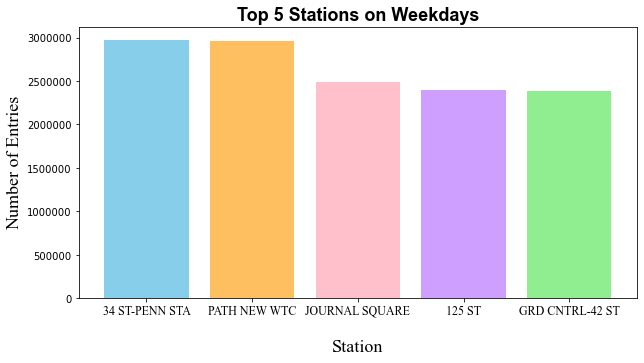

In [17]:
#Total ridership on weekdays-top 5 stations
c=["#87CEEB","#FEBF61","pink","#CF9FFF","#90EE90"]
plt.figure(figsize=(10,5))
plt.bar(weekday_entries.iloc[[0,1,2,3,4]]["STATION"],weekday_entries.iloc[[0,1,2,3,4]]["DAILY_ENTRIES"],align="center",color=c)
plt.title("Top 5 Stations on Weekdays", weight= 'bold',font="Arial",fontsize= 18)
plt.xlabel("\nStation",font="Times New Roman",fontsize=18)
plt.ylabel("Number of Entries",font="Times New Roman", fontsize=18)
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation='0\n', font="Times New Roman", fontsize=12);

A closer look at each station on weekdays

In [18]:
#Penn Station 
Penn_station=station_per_day[station_per_day['STATION']== '34 ST-PENN STA']
Penn_station['DAY']=pd.to_datetime(Penn_station['DATE']).dt.dayofweek 
Penn_station_wd=Penn_station.loc[Penn_station['DAY'].isin([0,1,2,3,4])]

In [19]:
#World Trade Center Station 
WTC_station=station_per_day[station_per_day['STATION']== 'PATH NEW WTC']
WTC_station['DAY']=pd.to_datetime(WTC_station['DATE']).dt.dayofweek 
WTC_station_wd=WTC_station.loc[WTC_station['DAY'].isin([0,1,2,3,4])]

In [20]:
#Journal Square Station 
Journal_station=station_per_day[station_per_day['STATION']== 'JOURNAL SQUARE']
Journal_station['DAY']=pd.to_datetime(Journal_station['DATE']).dt.dayofweek
Journal_station_wd=Journal_station.loc[Journal_station['DAY'].isin([0,1,2,3,4])]

In [21]:
#125 ST Station  
One25_station=station_per_day[station_per_day['STATION']== '125 ST']
One25_station['DAY']=pd.to_datetime(One25_station['DATE']).dt.dayofweek
One25_station_wd=One25_station.loc[One25_station['DAY'].isin([0,1,2,3,4])]

In [22]:
#Grand Central Station 
Grand_Central_station=station_per_day[station_per_day['STATION']== 'GRD CNTRL-42 ST']
Grand_Central_station['DAY']=pd.to_datetime(Grand_Central_station['DATE']).dt.dayofweek
Grand_Central_wd=Grand_Central_station.loc[Grand_Central_station['DAY'].isin([0,1,2,3,4])]

<b>Visualizing Weekday Ridership

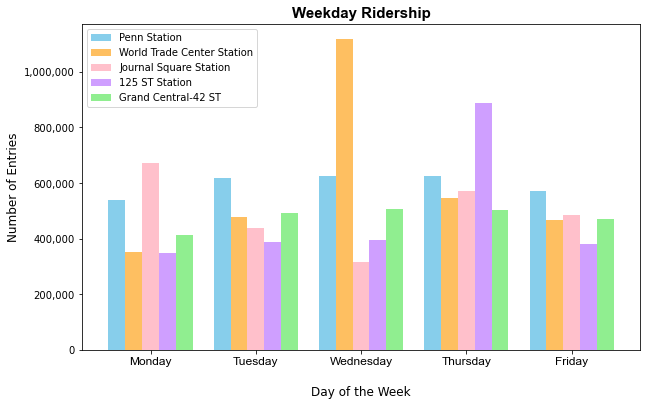

In [23]:
#Weekday ridership for top 5 stations
Penn_weekly=Penn_station_wd.groupby('DAY')['DAILY_ENTRIES'].sum()
WTC_weekly=WTC_station_wd.groupby('DAY')['DAILY_ENTRIES'].sum()
Journal_weekly=Journal_station_wd.groupby('DAY')['DAILY_ENTRIES'].sum()
One25_weekly=One25_station_wd.groupby('DAY')['DAILY_ENTRIES'].sum()
Grand_Central_weekly=Grand_Central_wd.groupby('DAY')['DAILY_ENTRIES'].sum()
var=pd.concat([Penn_weekly,WTC_weekly,Journal_weekly,One25_weekly,Grand_Central_weekly],axis=1)
var.plot(kind='bar',width=0.8,figsize=(10,6),color=["#87CEEB","#FEBF61","pink","#CF9FFF","#90EE90"])
plt.xlabel("\nDay of the Week", fontsize=12)
plt.ylabel("Number of Entries",fontsize=12)
plt.xticks([0,1,2,3,4],['Monday','Tuesday','Wednesday','Thursday','Friday'],rotation=0, font='Arial',fontsize=12)
num=plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in num])
plt.legend(("Penn Station","World Trade Center Station","Journal Square Station","125 ST Station","Grand Central-42 ST"))
plt.title("Weekday Ridership", fontsize=15,weight='bold',font='Arial');

Let's take a look on weekends

In [24]:
#Total ridership at each station on Weekends
weekend_df=mta_df.loc[mta_df['DAY'].isin([5,6])]
weekend_entries=weekend_df.groupby('STATION')['DAILY_ENTRIES'].sum().sort_values(ascending=False).reset_index()
weekend_entries.head()

,STATION,DAILY_ENTRIES
0,72 ST,621922.0
1,1 AV,612926.0
2,W 4 ST-WASH SQ,603983.0
3,34 ST-PENN STA,581980.0
4,WALL ST,541108.0


A closer look at each station on weekends

In [25]:
#72 ST Station 
Seventytwo_station=station_per_day[station_per_day['STATION']== '72 ST']
Seventytwo_station['DAY']=pd.to_datetime(Seventytwo_station['DATE']).dt.dayofweek 
Seventytwo_station_wk=Seventytwo_station.loc[Seventytwo_station['DAY'].isin([5,6])]

In [26]:
#1 AV Station 
First_station=station_per_day[station_per_day['STATION']== '1 AV']
First_station['DAY']=pd.to_datetime(First_station['DATE']).dt.dayofweek 
First_station_wk=First_station.loc[First_station['DAY'].isin([5,6])]

In [27]:
# W4 ST-WASH SQ Station  
W4_station=station_per_day[station_per_day['STATION']== 'W 4 ST-WASH SQ']
W4_station['DAY']=pd.to_datetime(W4_station['DATE']).dt.dayofweek 
W4_station_wk=W4_station.loc[W4_station['DAY'].isin([5,6])]

In [28]:
#Penn Station  
Penn_station_wk=Penn_station.loc[Penn_station['DAY'].isin([5,6])]

In [29]:
# Wall ST Station  
Wall_station=station_per_day[station_per_day['STATION']== 'WALL ST']
Wall_station['DAY']=pd.to_datetime(Wall_station['DATE']).dt.dayofweek 
Wall_station_wk=Wall_station.loc[Wall_station['DAY'].isin([5,6])]

<b>Visualizing Weekend Ridership

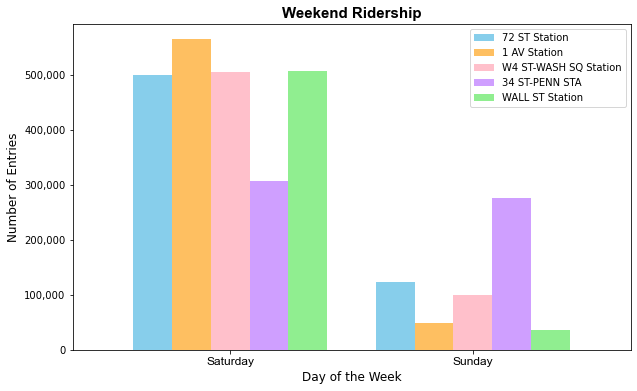

In [30]:
#Weekend Ridership for top 5 stations
Seventytwo_weekend=Seventytwo_station_wk.groupby('DAY')['DAILY_ENTRIES'].sum()
First_weekend=First_station_wk.groupby('DAY')['DAILY_ENTRIES'].sum()
W4_weekend=W4_station_wk.groupby('DAY')['DAILY_ENTRIES'].sum()
Penn_weekend=Penn_station_wk.groupby('DAY')['DAILY_ENTRIES'].sum()
Wall_weekend=Wall_station_wk.groupby('DAY')['DAILY_ENTRIES'].sum()
var=pd.concat([Seventytwo_weekend,First_weekend,W4_weekend,Penn_weekend,Wall_weekend],axis=1)
var.plot(kind='bar',width=0.8,figsize=(10,6),color=["#87CEEB","#FEBF61","pink","#CF9FFF","#90EE90"])
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Number of Entries",fontsize=12)
plt.xticks([0,1],['Saturday','Sunday'],rotation=0, font='Arial',fontsize=12)
num=plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in num])
plt.legend(("72 ST Station","1 AV Station","W4 ST-WASH SQ Station", "34 ST-PENN STA","WALL ST Station"))
plt.title("Weekend Ridership", fontsize=15,weight='bold',font='Arial');

<b><font size="2">Subway location on the map</font>

In [31]:
#Subway location on weekdays-red icon
m = folium.Map(location=[40.75229,-73.99332],zoom_start=10.5,tiles='Stamen Terrain')
folium.Marker(location=[40.75229,-73.99332],popup='34 ST-PENN STA',icon=folium.Icon(color="red"),).add_to(m)
folium.Marker(location=[40.71265,-74.00986],popup='PATH NEW WTC',icon=folium.Icon(color="red"),).add_to(m)
folium.Marker(location=[40.73210, -74.06302],popup='JOURNAL SQUARE',icon=folium.Icon(color="red"),).add_to(m)
folium.Marker(location=[40.81092, -73.95210],popup='125 ST',icon=folium.Icon(color="red"),).add_to(m)
folium.Marker(location=[40.75314, -73.97672],popup='GRD CNTRL-42 ST',icon=folium.Icon(color="red"),).add_to(m)
#Subway Location on weekends-blue icon
folium.Marker(location=[40.76886,-73.95802],popup='72 ST').add_to(m)
folium.Marker(location=[40.73143,-73.98205],popup='1 AV').add_to(m)
folium.Marker(location=[40.73116,-74.00125],popup='W 4 ST-WASH SQ').add_to(m)
folium.Marker(location=[40.75229,-73.99332],popup='34 ST-PENN STA').add_to(m)
folium.Marker(location=[40.70774,-74.01169],popup='WALL ST').add_to(m)
m